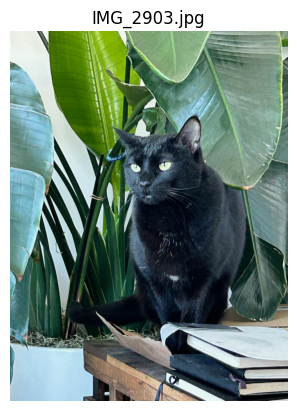

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

guided_img_path = '/Users/sinanozdemir/Desktop/photos/IMG_2903.jpg'
img = Image.open(guided_img_path)

plt.imshow(img)
plt.axis('off')
plt.title(guided_img_path.split('/')[-1])
plt.show()


In [ ]:
import moondream as md
from PIL import Image

# Initialize for Moondream Cloud
cloud_model = md.vl(api_key="your-moondream-api-key-here")


In [17]:
# Generate a caption
caption = cloud_model.caption(img)["caption"]
print("Caption:", caption)

# Ask a question
answer = cloud_model.query(img, "What's in this image?")["answer"]
print("Answer:", answer)

Caption: A black cat with striking green eyes is perched on a wooden table, its gaze fixed directly on the camera. The cat is situated between a bunch of large, dark green leaves with prominent veins and a small white pot containing a green plant. The white pot appears to be placed directly on the floor or potentially on a piece of furniture rather than on a shelf. Two books are stacked on the wooden table near the cat. The background features a white wall.
Answer: A black cat is sitting on a wooden table, looking directly at the camera. Its eyes are a bright, alert green. Next to the cat, there is a stack of books on the table. On the left side of the image, there is a large green plant with broad leaves. The background features a white wall, creating a simple and uncluttered setting for the cat and the books.


Detecting objects:
Found 1 cat(s)


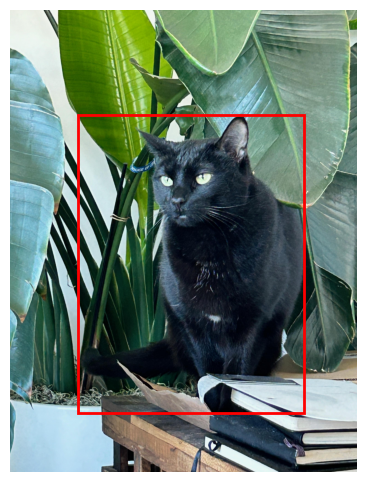

In [18]:
# 3. Object Detection

import matplotlib.pyplot as plt

print("Detecting objects:")
objects = cloud_model.detect(img, "cat")["objects"]
print(f"Found {len(objects)} cat(s)")

# Draw bounding boxes on the image
img_with_boxes = img.copy()
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_with_boxes)

# If objects are normalized, convert to pixel coordinates
img_w, img_h = img_with_boxes.size
for obj in objects:
    x_min = int(obj['x_min'] * img_w)
    y_min = int(obj['y_min'] * img_h)
    x_max = int(obj['x_max'] * img_w)
    y_max = int(obj['y_max'] * img_h)
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                         linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.show()

In [5]:
cloud_points = cloud_model.point(img, "cat")["points"]

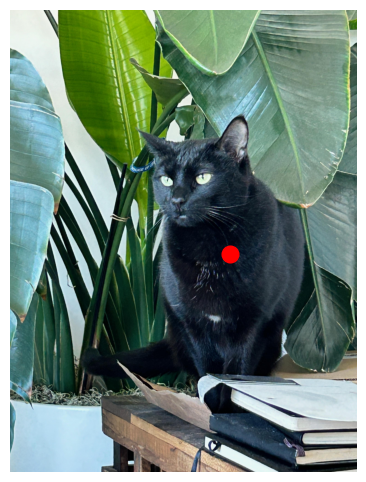

In [19]:
# 4. Visual Pointing

import matplotlib.pyplot as plt

# Draw point(s) on the image
img_with_points = img.copy()
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_with_points)

img_w, img_h = img_with_points.size
for pt in cloud_points:
    x = pt['x'] * img_w
    y = pt['y'] * img_h
    ax.plot(x, y, marker='o', markersize=12, color='red')

plt.axis('off')
plt.show()

In [7]:
from langchain_core.tools import tool

@tool
def moondream_cloud_caption(image_path: str) -> str:
    """Generate a caption for an image using Moondream Cloud."""
    image = Image.open(image_path)
    return cloud_model.caption(image)["caption"]

# Let's inspect some of the attributes associated with the tool.
print(moondream_cloud_caption.name)
print(moondream_cloud_caption.description)
print(moondream_cloud_caption.args)
print(moondream_cloud_caption.args_schema.model_json_schema())


moondream_cloud_caption
Generate a caption for an image using Moondream Cloud.
{'image_path': {'title': 'Image Path', 'type': 'string'}}
{'description': 'Generate a caption for an image using Moondream Cloud.', 'properties': {'image_path': {'title': 'Image Path', 'type': 'string'}}, 'required': ['image_path'], 'title': 'moondream_cloud_caption', 'type': 'object'}


In [8]:
# Ask a question
answer = cloud_model.query(img, "What's in this image?")["answer"]
print("Answer:", answer)

Answer: A black cat is sitting on a wooden table, looking directly at the camera. Its eyes are a bright, alert green. Next to the cat, there is a stack of books on the table. On the left side of the image, there is a large green plant with broad leaves. The background features a white wall, creating a simple and uncluttered setting for the cat and the books.


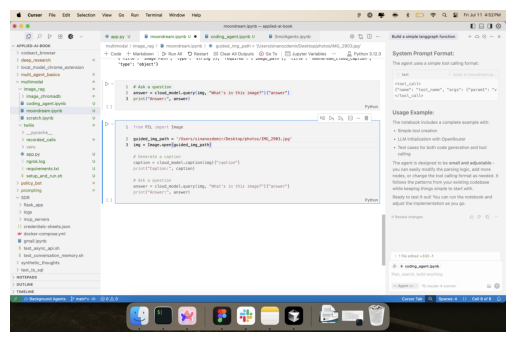

In [11]:
guided_img_path = '/Users/sinanozdemir/Desktop/sc.png'
img = Image.open(guided_img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [10]:
# Ask a question
answer = cloud_model.query(img, "If I wanted to close out of this current tab, what would I do? Tell me where I need to click, drag, double click and x, y coordinates for all of them. give the answer in a json format like this: {'click': {'x': ...")["answer"]
print("Answer:", answer)

Answer: {
  "close": {
    "x": 0,
    "y": 0
  }
}
